In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [1]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                   /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                  *  /home/jp/miniconda2



# Dipper (sub-)list

The links below show the quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* [EPIC203824153](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203824153.html)
* [EPIC203937317](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203937317.html)
* [EPIC204278916](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204278916.html)
* [EPIC204469637](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204469637.html)
* [EPIC204514548](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204514548.html)
* [EPIC204630363](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204630363.html)
* [EPIC204638512](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204638512.html)
* [EPIC205151387](https://www.cfa.harvard.edu/~avanderb/k2c2/ep205151387.html)
* [EPIC203384911](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203384911.html)

## k2plr for downloading lightcurve

In [8]:
import k2plr
k2plr.__version__

'0.2.5'

In [9]:
client = k2plr.API()
epic = client.k2_star(203824153)

In [10]:
print(epic.k2_ra, epic.k2_dec)

(247.225281, -24.795612)


In [21]:
lcs = epic.get_target_pixel_files()

In [46]:
#from astropy.io import fits
hdulist = lc.open()
hdulist.close()

In [48]:
hdulist.info()

Filename: /home/jp/.kplr/data/k2/target_pixel_files/203824153/ktwo203824153-c02_lpd-targ.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      54   ()              
1    TARGETTABLES  BinTableHDU    274   3856R x 12C   [D, E, J, 110J, 110E, 110E, 110E, 110E, 110E, J, E, E]   
2    APERTURE    ImageHDU        48   (11, 10)     int32   


In [52]:
hdulist[0].header['OBJECT']

'EPIC 203824153'

In [68]:
hdulist = lc.open()
#get keys of a structured (numpy?) array
hdulist[1].data.dtype.names

('TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2')

In [69]:
# Loop over the datasets and read in the data.
time, flux, ferr, quality = [], [], [], []
for lc in lcs:
    with lc.open() as f:
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data #pyfits.fitsrec.FITS_rec
        time.append(hdu_data["time"])
        flux.append(hdu_data["flux"])
        ferr.append(hdu_data["flux_err"])
        quality.append(hdu_data["quality"])

In [100]:
import numpy as np
np.array(flux).shape #10x11 pix with 3856 measurements

(1, 3856, 10, 11)

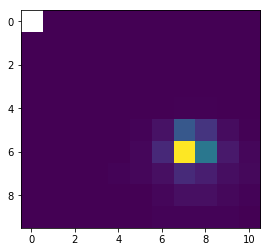

In [92]:
%matplotlib inline
plt.imshow(flux[0][0])

## Corrected lightcurves from Vanderburg website

* [campaign 2](https://www.cfa.harvard.edu/~avanderb/k2c2/)

The advantage of this approach over using everest-pipeline is that direct download of corrected lightcurve is possible, making analysis relatively quickly. Take caution however that the pipeline might remove inherent variability in the dipper lightcurve so study how the pipeline exactly does the correction. 

In [103]:
epics='''203824153
203937317
204278916
204469637
204514548
204630363
204638512
205151387
203384911'''.split('\n')

In [6]:
import pandas as pd

campaign=str(2)
epic = '203824153'

part1='http://archive.stsci.edu/missions/hlsp/k2sff/c0'
part2='00000/'
part3='/hlsp_k2sff_k2_lightcurve_'
part4='_kepler_v1_llc-default-aper.txt'

url=part1+campaign+'/'+epic[:4]+part2+epic[-5:]+part3+epic+'-c0'+campaign+part4

#
df = pd.read_csv(url, sep=",", header=0, index_col=False)
df.head()

,BJD - 2454833,Corrected Flux
0,2061.305881,1.127189
1,2061.326313,1.126225
2,2061.346746,1.126394
3,2061.367178,1.124251
4,2061.387610,1.126310


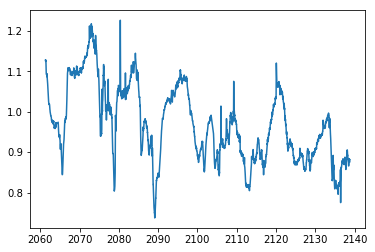

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df[df.columns[0]], df[df.columns[1]])

## PyTransit for fitting lightcurve

## Playing with data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#load csv
df1 = pd.read_csv('data/203843911.csv', index_col=0)
df2 = pd.read_csv('data/203824153.csv', index_col=0)
df3 = pd.read_csv('data/203937317.csv', index_col=0)
df4 = pd.read_csv('data/204278916.csv', index_col=0)
df5 = pd.read_csv('data/204469637.csv', index_col=0)
df6 = pd.read_csv('data/204514548.csv', index_col=0)
df7 = pd.read_csv('data/204630363.csv', index_col=0)
df8 = pd.read_csv('data/204638512.csv', index_col=0)
df9 = pd.read_csv('data/205151387.csv', index_col=0)

df1.head()

,EPIC153
2060.284270,6223.242905
2060.304702,6236.089386
2060.325134,6259.457610
2060.345567,6282.849649
2060.365999,6256.764671


In [3]:
#concatenate
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
df = pd.concat(frames, axis=1)

#remove negative fluxes
df[df>0].head()

,EPIC153,EPIC317,EPIC916,EPIC548,EPIC637,EPIC363,EPIC512,EPIC387,EPIC911
2060.283697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2060.283812,NaN,NaN,16272.938683,NaN,NaN,NaN,NaN,NaN,NaN
2060.283833,NaN,NaN,NaN,NaN,NaN,NaN,281413.744662,NaN,NaN
2060.283854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79271.369015,NaN
2060.283931,NaN,NaN,NaN,NaN,NaN,122254.585294,NaN,NaN,NaN


There are uneven cadence in each dipper above but their difference is quite small.

How many data points per target after removing NaN in each?

In [4]:
for key in df.columns:
    print('{0}: {1}'.format(key, len(df[str(key)].dropna())))

EPIC153: 3811
EPIC317: 3811
EPIC916: 3811
EPIC548: 3811
EPIC637: 3811
EPIC363: 3811
EPIC512: 3811
EPIC387: 3811
EPIC911: 3811


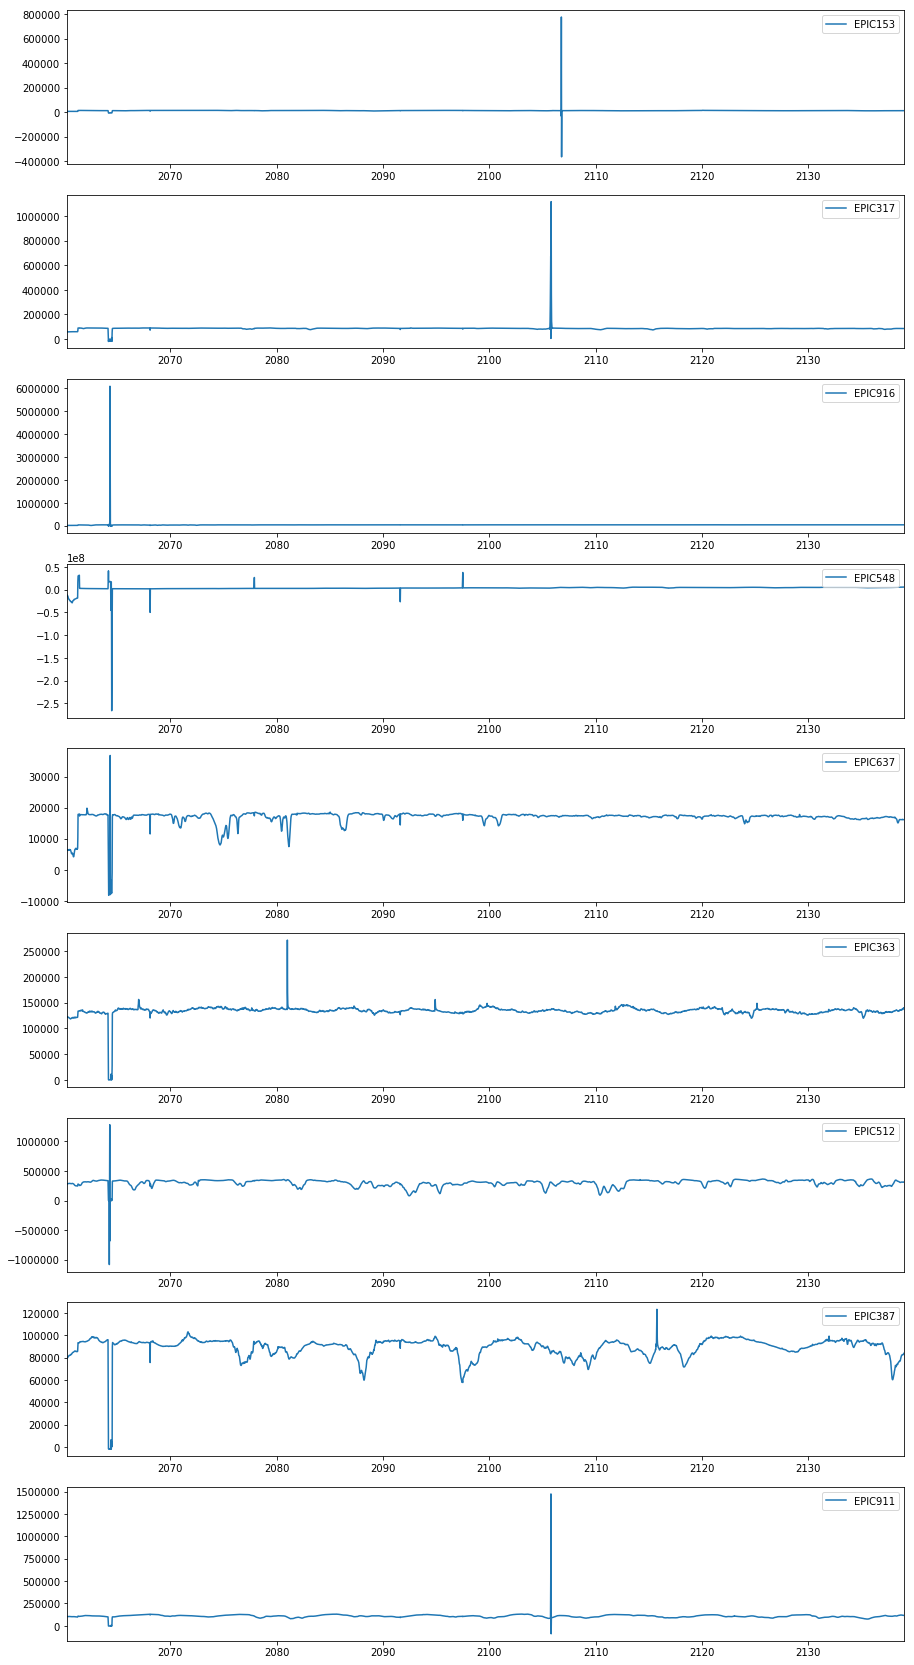

In [4]:
#df[df>0].plot(subplots=True, figsize=(15,30));

#colormap = plt.cm.Dark2.colors 
fig, ax = plt.subplots(nrows=9,ncols=1, figsize=(15,30))
for i,j in enumerate(df.columns):
    df[str(j)].dropna().plot(ax=ax[i], legend=True)

In [5]:
#remove na in each column
for i in df.columns:
    df[str(i)] = df[str(i)].dropna()

## algorithm

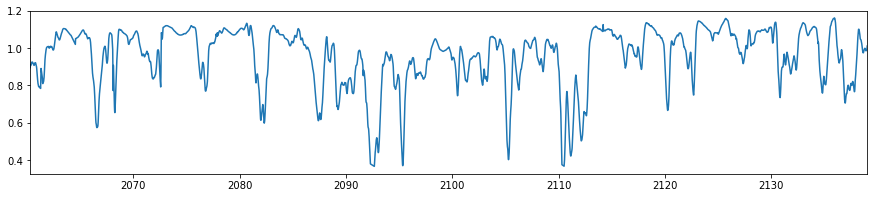

In [6]:
#remove outliers
sigma=3
EPIC512=df.EPIC512[np.abs(df.EPIC512-df.EPIC512.mean())<=(sigma*df.EPIC512.std())]
#normalize
EPIC512/=np.nanmedian(df.EPIC512)
EPIC512.plot(figsize=(15,3));

In [302]:
EPIC512.head()

2060.283833    0.895616
2060.304265    0.905298
2060.324698    0.908722
2060.345129    0.907807
2060.365562    0.912496
Name: EPIC512, dtype: float64

In [317]:
df.keys()

Index([u'EPIC153', u'EPIC317', u'EPIC916', u'EPIC548', u'EPIC637', u'EPIC363',
       u'EPIC512', u'EPIC387', u'EPIC911'],
      dtype='object')

In [335]:
EPIC512=pd.DataFrame(df.EPIC512)
EPIC512.head()
t= EPIC512.dropna().index
f=EPIC512.EPIC512.dropna().values
f

array([ 0.89561583,  0.90529845,  0.90872236, ...,  0.99336231,
        0.99910706,  1.0112849 ])

(0, 0.1)

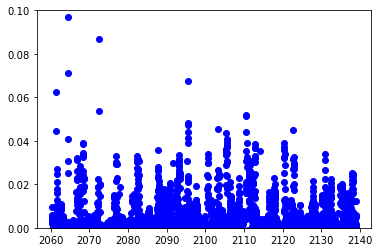

In [340]:
plt.plot(t[:-1],np.diff(f),'bo')
plt.ylim(0,0.1)

In [341]:
!pip install peakutils

  Running setup.py bdist_wheel for peakutils ... done
  Stored in directory: /home/jp/.cache/pip/wheels/cb/17/d9/ae7f621c1e24ce2e4da18ca9f01b032f4474bb1b04822d886e
Successfully built peakutils


In [355]:
import peakutils as pu
from peakutils.plot import plot as pplot 

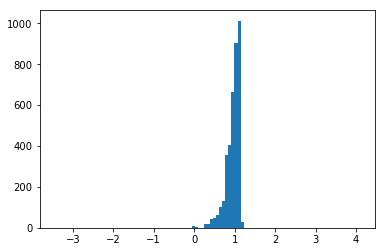

In [382]:
plt.hist(f,bins=100);

(0, 1.2)

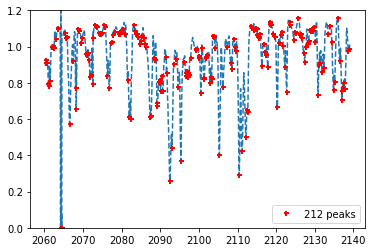

In [376]:
peaks = pu.indexes(1.3-f, thres=0.3, min_dist=3)
pplot(t,f,peaks)
plt.ylim(0,1.2)

array([   3,   10,   18,   39,   48,   58,   88,   95,  105,  133,  189,
        192,  195,  198,  201,  203,  260,  265,  301,  304,  348,  375,
        383,  447,  456,  508,  513,  518,  534,  543,  558,  564,  592,
        599,  679,  681,  684,  687,  690,  775,  797,  822,  827,  830,
        835,  838,  849,  851,  924,  928,  995, 1027, 1048, 1064, 1137,
       1145, 1147, 1161, 1180, 1183, 1195, 1210, 1233, 1245, 1249, 1258,
       1312, 1322, 1358, 1365, 1396, 1401, 1421, 1424, 1427, 1433, 1441,
       1455, 1470, 1508, 1515, 1557, 1584, 1607, 1635, 1663, 1696, 1732,
       1754, 1764, 1770, 1772, 1782, 1791, 1796, 1816, 1880, 1890, 1919,
       1927, 1945, 1963, 1983, 1989, 2005, 2010, 2027, 2060, 2073, 2080,
       2098, 2105, 2112, 2125, 2178, 2224, 2277, 2320, 2335, 2356, 2368,
       2371, 2373, 2384, 2426, 2462, 2509, 2524, 2533, 2655, 2665, 2673,
       2677, 2688, 2710, 2736, 2738, 2750, 2754, 2757, 2761, 2783, 2852,
       2870, 2900, 2925, 2929, 2948, 2975, 2993, 30

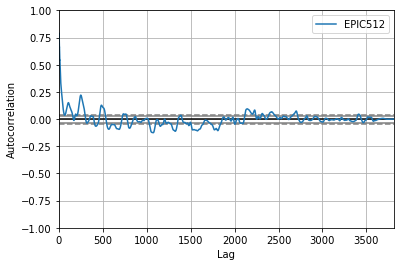

In [7]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EPIC512.dropna(), label='EPIC512');

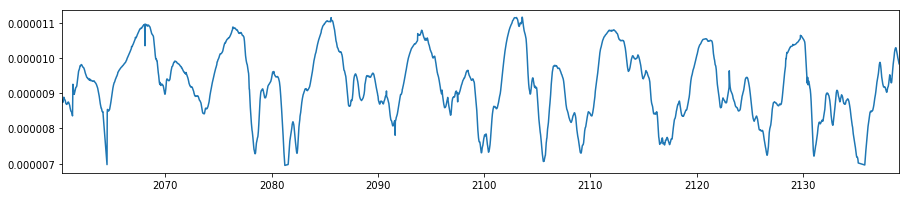

In [49]:
#remove outliers
sigma=1
EPIC911=df.EPIC911[np.abs(df.EPIC911-df.EPIC911.mean())<=(sigma*df.EPIC911.std())]/np.nanmedian(df.EPIC911)
# normalize
EPIC911/=np.nanmedian(df.EPIC911)
EPIC911.plot(figsize=(15,3));

this is probably thruster firings!

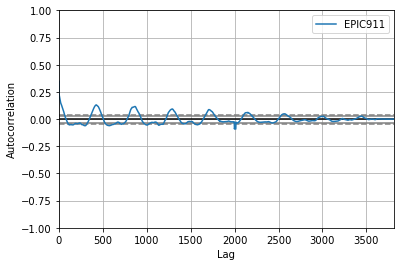

In [51]:
autocorrelation_plot(df.EPIC911.dropna(), label='EPIC911');

To classify the periodicity, we fit a hyperbolic secant function with time varying dip depths to each light curve:
$$
y = F_0 - \sum_n 2D(t_n) \times \Big[\exp \Big(\frac{t-t_n}{\tau}\Big) +\exp \Big(-\frac{t-t_n}{\tau} \Big)\Big]^{-1}
$$
where $t_n = t_0+nP_{rot}$

* $F_0$ is the baseline flux level
* $t_0$ is the location of the first dip in the light curve
* $n$ is the dip number
* $P_{rot}$ is the inferred rotation period (assumed to be fixed)
* $\tau$ is the dip duration
* $D(t_n)$ is the depth of dip n

Try Levenberg–Marquardt technique for $\chi^2$ minimization.

In [116]:
def sech(x,A):
    return A/np.cosh(x)

def sech2(x,A):
    return 2.0*A/(np.exp(x)+np.exp(-x))

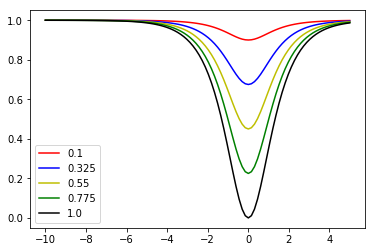

In [204]:
tau = 1
t0 = 5
Prot = 10
dips = 2
#tn = t0+n*Prot

t = np.linspace(-t0,Prot, 100)
x = (t-t0)/tau

y = []
B = 1.0 #baseline
dips = np.linspace(0.1,1,5) #dip depth

y = {}
for n, A in enumerate(dips):
    y[n]=[]
    for i in x:
        yi = B-sech2(i,A)
        y[n].append(yi)
        
c='r,b,y,g,k,c'.split(',')

for i,j in enumerate(dips):
    plt.plot(x,y[i],'r-',color=c[i], label=j);
plt.legend(loc='best')

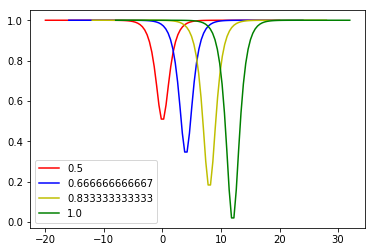

In [300]:
tau = 0.1
t0 = 2.0
Prot = 4.0
B = 1.0 #baseline

dips = np.linspace(0.5,1,4) #dip depth

y = {}
x = {}
t=[0]
for n, A in enumerate(dips):
    y[n]=[]
    t = np.linspace(t[-1],(n+1)*Prot, 100)
    #print(t)
    x = (t-(t0+n*Prot))/tau
    for i in x:
        yi = B-sech2(i,A)
        y[n].append(yi)
        
c='r,b,y,g,k,c'.split(',')

for i,j in enumerate(dips):
    plt.plot(i*Prot+x,y[i],'r-',color=c[i], label=j);
    #plt.xlim(x[i][0],x[i][-1])
plt.legend(loc='best')

In [227]:
df.keys()

Index([u'EPIC153', u'EPIC317', u'EPIC916', u'EPIC548', u'EPIC637', u'EPIC363',
       u'EPIC512', u'EPIC387', u'EPIC911'],
      dtype='object')

In [61]:
dipper = df.EPIC512

In [62]:
#normalize
dipper/=np.nanmedian(dipper)

In [63]:
dipper.head()

2060.283697         NaN
2060.283812         NaN
2060.283833    0.895616
2060.283854         NaN
2060.283931         NaN
Name: EPIC512, dtype: float64

In [64]:
np.nanmedian(dipper)

1.0

In [ ]:
def secant(F0, D, t, tn, tau):
    t_scaled = (t - tn)/tau
    factor = np.exp(t_scaled)+np.exp(-t_scaled)
    y = F0 - 2*D*1.0/factor
    return y

In [ ]:
#count dips

#measure depth of dip n
D = []

#measure dip duration
tau = []

time until flux ~ median flux

In [ ]:
#constants
F0 = np.nanmedian(dipper) #1 if normalized
Prot = 49.23 #based on L-S periodogram
time = dipper.index

f=[]
for t in time:
    for idx,dip in enumerate(dips):
        t_n = t0 + n*Prot
        f_i = secant(F0, dip, t, tn, tau[idx])
        f.append(f_i)

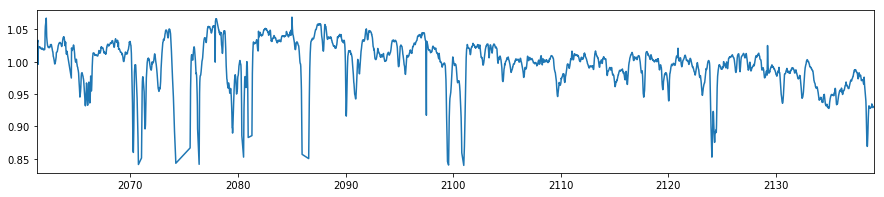

In [13]:
#remove outliers
sigma=1
EPIC637=df.EPIC637[np.abs(df.EPIC637-df.EPIC637.mean())<=(sigma*df.EPIC637.std())]
#normalize
EPIC637/=np.nanmedian(df.EPIC637)
EPIC637.plot(figsize=(15,3));

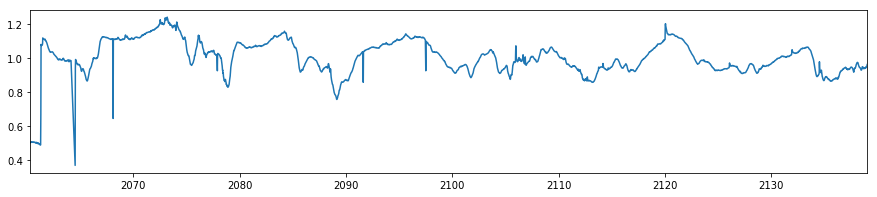

In [6]:
#remove outliers
sigma=1
EPIC153=df.EPIC153[np.abs(df.EPIC153-df.EPIC153.mean())<=(sigma*df.EPIC153.std())]
# normalize
EPIC153/=np.nanmedian(df.EPIC153)
EPIC153.plot(figsize=(15,3));

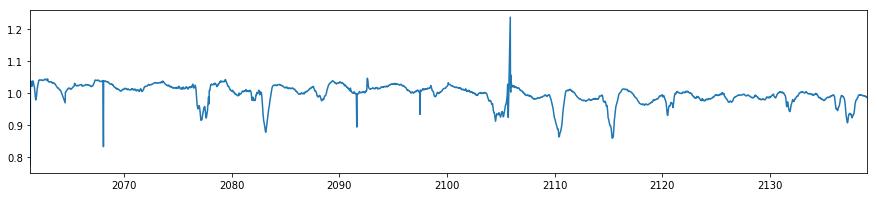

In [8]:
#remove outliers
sigma=1
EPIC317=df.EPIC317[np.abs(df.EPIC317-df.EPIC317.mean())<=(sigma*df.EPIC317.std())]
# normalize
EPIC317/=np.nanmedian(df.EPIC317)
EPIC317.plot(figsize=(15,3));

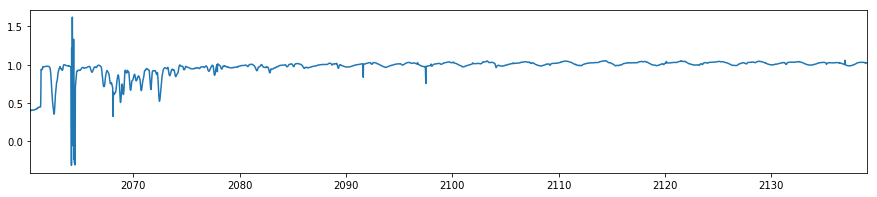

In [9]:
#remove outliers
sigma=1
EPIC916=df.EPIC916[np.abs(df.EPIC916-df.EPIC916.mean())<=(sigma*df.EPIC916.std())]
# normalize
EPIC916/=np.nanmedian(df.EPIC916)
EPIC916.plot(figsize=(15,3));

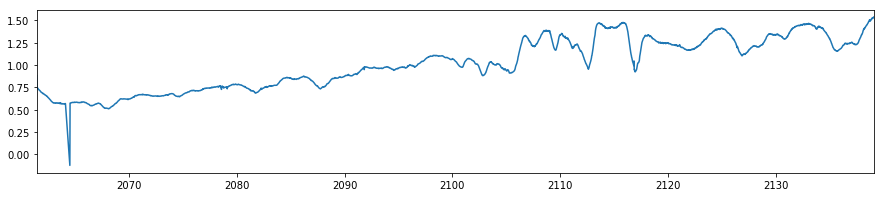

In [10]:
#remove outliers
sigma=1
EPIC548=df.EPIC548[np.abs(df.EPIC548-df.EPIC548.mean())<=(sigma*df.EPIC548.std())]
# normalize
EPIC548/=np.nanmedian(df.EPIC548)
EPIC548.plot(figsize=(15,3));

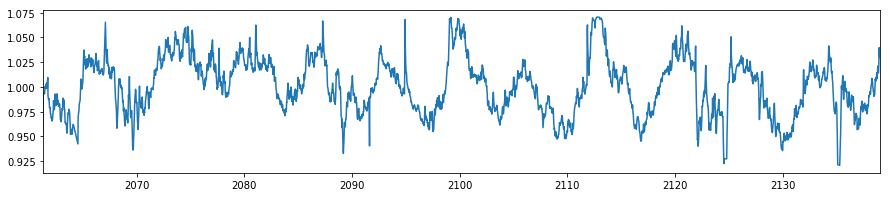

In [11]:
#remove outliers
sigma=1
EPIC363=df.EPIC363[np.abs(df.EPIC363-df.EPIC363.mean())<=(sigma*df.EPIC363.std())]
# normalize
EPIC363/=np.nanmedian(df.EPIC363)
EPIC363.plot(figsize=(15,3));

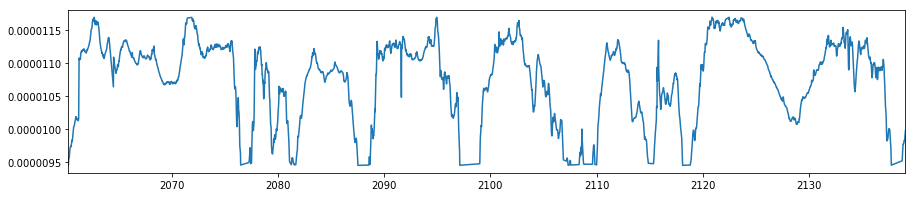

In [7]:
#remove outliers
sigma=1
EPIC387=df.EPIC387[np.abs(df.EPIC387-df.EPIC387.mean())<=(sigma*df.EPIC387.std())]/np.nanmedian(df.EPIC387)
# normalize
EPIC387/=np.nanmedian(df.EPIC387)
EPIC387.plot(figsize=(15,3));

## Phase-folding: Lomb-Scargle Periodogram

In [16]:
import gatspy
from gatspy.periodic import LombScargleFast

periods={}
powers ={}
for i in df.columns:
    t, f = df[str(i)].dropna().index, df[str(i)].dropna()
    model = LombScargleFast().fit(t, f)
    periods[str(i)], powers[str(i)] = model.periodogram_auto(nyquist_factor=100)

In [17]:
periods.keys()

['EPIC363',
 'EPIC317',
 'EPIC916',
 'EPIC637',
 'EPIC153',
 'EPIC911',
 'EPIC512',
 'EPIC387',
 'EPIC548']

In [18]:
#determine peak period in each lightcurve
for j,key in enumerate(periods.keys()):
    idx1 = periods[key] > 1.0
    idx2 = np.argmax(powers[key][idx1])
    peak = periods[key][idx1][idx2]
    print('{0}: {1:.2f} d'.format(key,peak))

EPIC363: 6.56 d
EPIC317: 2.72 d
EPIC916: 7.57 d
EPIC637: 393.82 d
EPIC153: 12.31 d
EPIC911: 8.95 d
EPIC512: 49.23 d
EPIC387: 10.10 d
EPIC548: 393.82 d


EPIC637 and EPIC548 have anomalously long "periods"

/home/jp/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


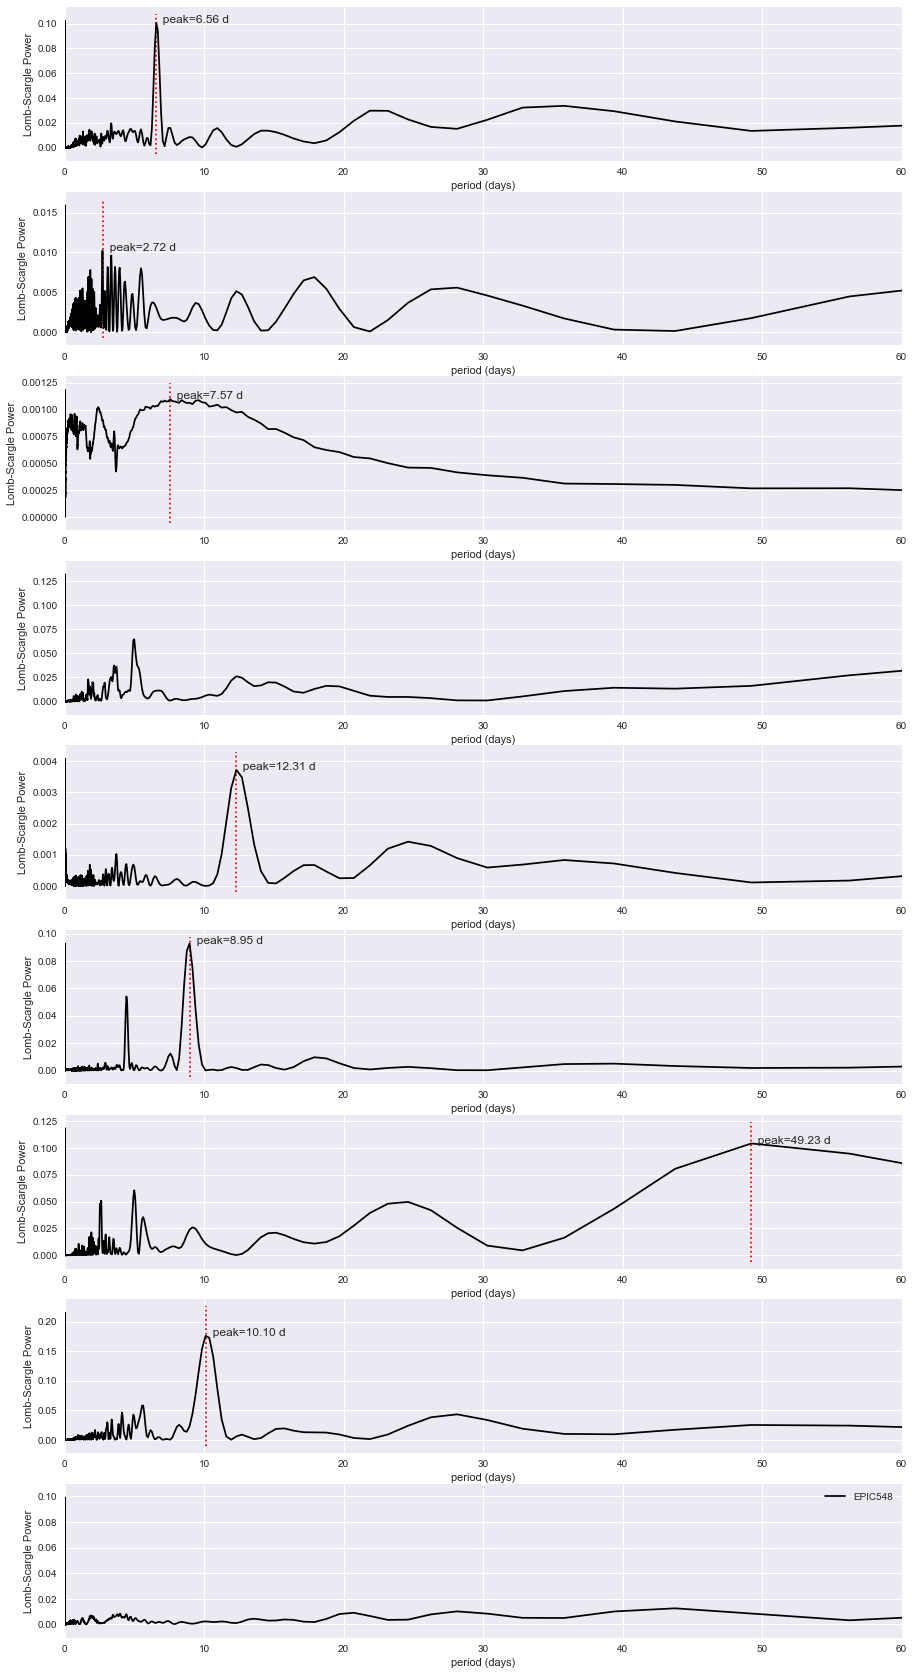

In [19]:
import seaborn as sb

fig, ax = plt.subplots(nrows=9,ncols=1,figsize=(15,30))

for j,key in enumerate(periods.keys()):
    idx1 = periods[key] > 1.0
    idx2 = np.argmax(powers[key][idx1])
    peak = periods[key][idx1][idx2]
    try:
        with sb.axes_style('white'):
            ax[j].plot(periods[key], powers[key], 'k-', label=key)
            
            xlim=60
            ax[j].set(xlim=(0, xlim),
        #         , ylim=(0, 0.01),
               xlabel='period (days)',
               ylabel='Lomb-Scargle Power')
            ax[j].vlines(peak, *ax[j].get_ylim(), linestyles='dotted', colors='r')
            if  peak < xlim:
                ax[j].text(peak, powers[key][idx1][idx2], '  peak={0:.2f} d'.format(peak))
        plt.legend()
    except:
        pass

Phase-folding functions.

In [20]:
def get_tns(t, p, t0):

    idx = t != 0
    t = t[idx]

    while t0-p > t.min():
        t0 -= p
    if t0 < t.min():
        t0 += p

    tns = [t0+p*i for i in range(int((t.max()-t0)/p+1))]

    while tns[-1] > t.max():
        tns.pop()

    while tns[0] < t.min():
        tns = tns[1:]

    return tns


def extract_individual(star, p, t0, width=1):

    t, f = star.time, star.flux
    idx = np.isfinite(t) & np.isfinite(f)
    t, f = t[idx], f[idx]

    tns =  get_tns(t, p, t0)

    transits = []
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        if idx.sum() == 0:
            continue
        ti = t[idx].tolist()
        fi = f[idx].tolist()
        transits.append((ti,fi))

    return transits

def fold(t, f, p, t0, width=0.4, clip=False, bl=False, t14=0.2):
    tns = get_tns(t, p, t0)
    tf, ff = np.empty(0), np.empty(0)
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        ti = t[idx]-tn
        fi = f[idx]
        fi /= np.nanmedian(fi)
        if bl:
            idx = (ti < -t14/2.) | (ti > t14/2.)
            assert np.isfinite(ti[idx]).all() & np.isfinite(fi[idx]).all()
            assert idx.sum() > 0
            try:
                res = sm.RLM(fi[idx], sm.add_constant(ti[idx])).fit()
                if np.abs(res.params[1]) > 1e-2:
                    print('bad data probably causing poor fit')
                    print('transit {} baseline params: {}'.format(i, res.params))
                    continue
                model = res.params[0] + res.params[1] * ti
                fi = fi - model + 1
            except:
                print("error computing baseline for transit {}".format(i))
                print("num. points: {}".format(idx.sum()))
                print(ti)
        tf = np.append(tf, ti)
        ff = np.append(ff, fi / np.nanmedian(fi))
    idx = np.argsort(tf)
    tf = tf[idx]
    ff = ff[idx]
    if clip:
        fc = sigma_clip(ff, sigma_lower=10, sigma_upper=2)
        tf, ff = tf[~fc.mask], ff[~fc.mask]
    return tf, ff

Determine t0.

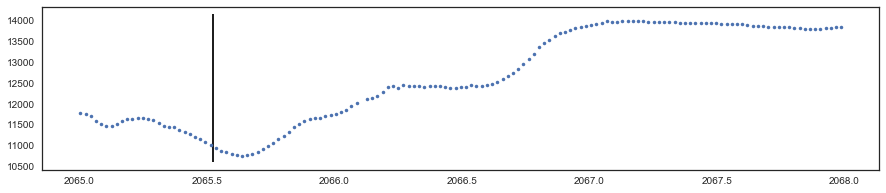

In [21]:
#test in one sample
t, f = df.EPIC153.dropna().index, df.EPIC153.dropna()
idx = (2065 < t) & (t < 2068)

tsub, fsub = t[idx], f[idx]
idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
t0 = np.median(tsub[idx])

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(tsub, fsub, '.')
    ax.vlines(t0, *ax.get_ylim())

Fold at t0 given period.

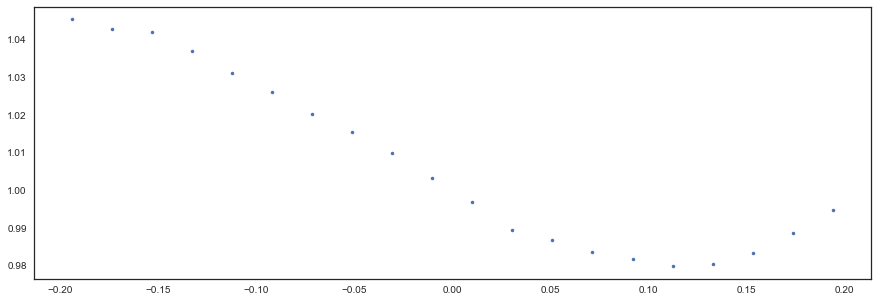

In [22]:
tf, ff = fold(df.EPIC153.dropna().index, df.EPIC153.dropna(), peak, t0)
with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(tf, ff, '.')

Try to phase-fold all the 9 lightcurves.

/home/jp/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jp/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


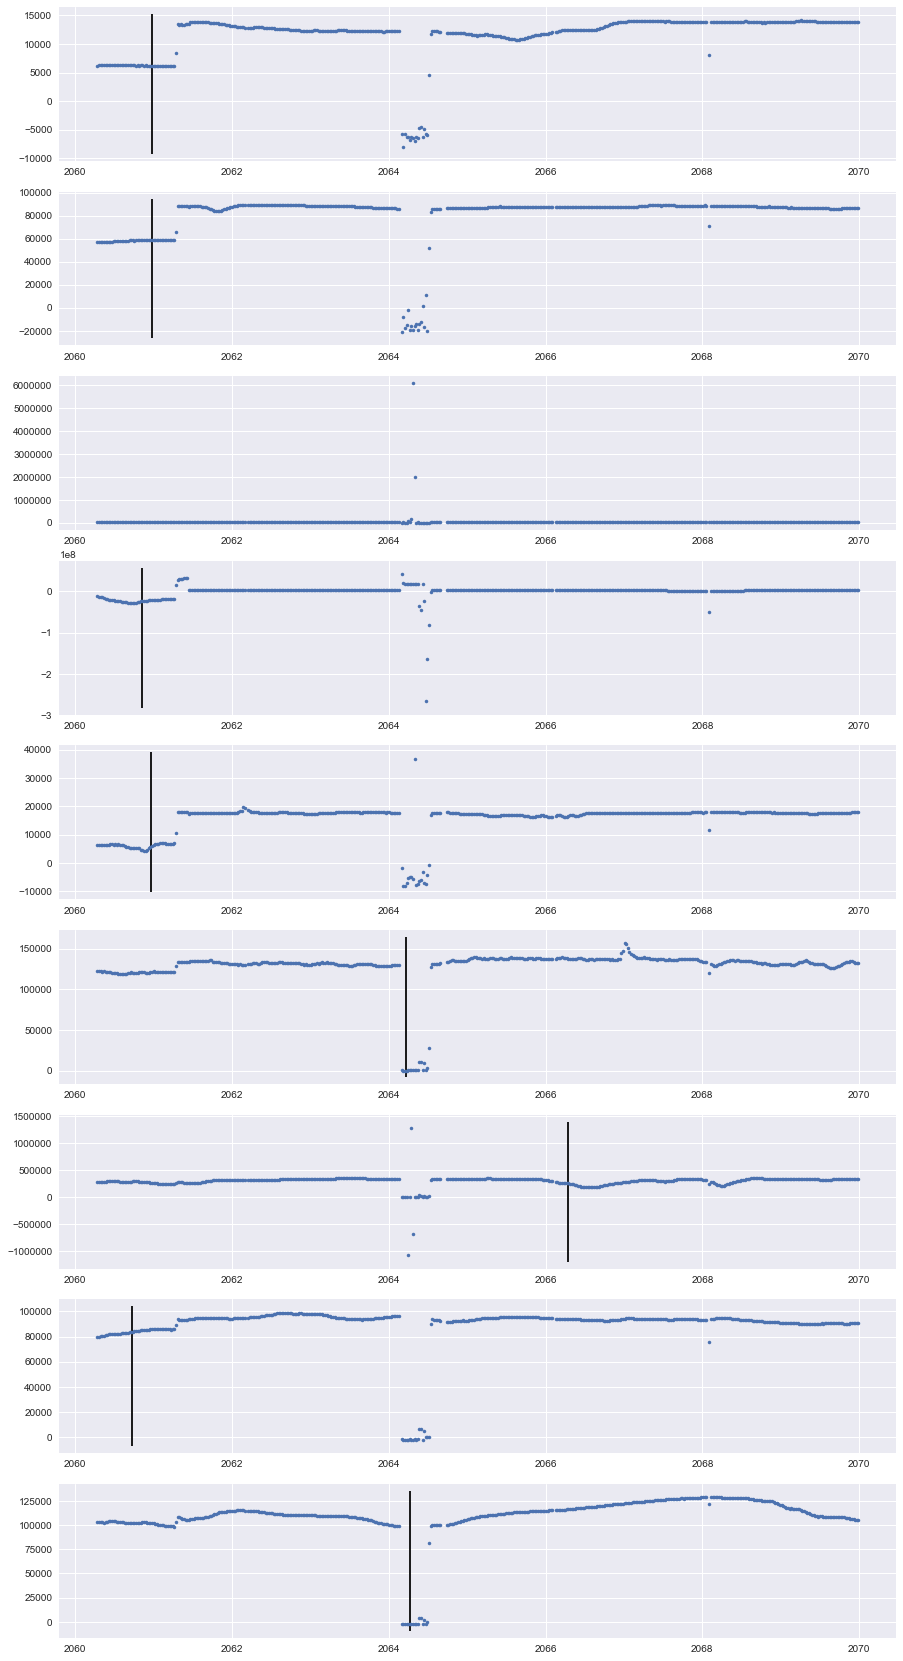

In [23]:
fig, ax = plt.subplots(nrows=9,ncols=1,figsize=(15,30))

for i, key in enumerate(df.columns):
    t, f = df[str(key)].dropna().index, df[str(key)].dropna()
    
    #constraint
    idx = (2060 < t) & (t < 2070)

    tsub, fsub = t[idx], f[idx]
    idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
    t0 = np.median(tsub[idx])

    with sb.axes_style('white'):
        ax[i].plot(tsub, fsub, '.')
        ax[i].vlines(t0, *ax[i].get_ylim())

## Autocorrelation

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

In [24]:
df.keys()

Index([u'EPIC153', u'EPIC317', u'EPIC916', u'EPIC548', u'EPIC637', u'EPIC363',
       u'EPIC512', u'EPIC387', u'EPIC911'],
      dtype='object')

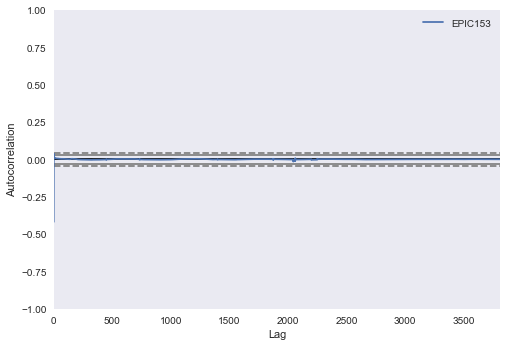

In [25]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EPIC153.dropna(), label='EPIC153');

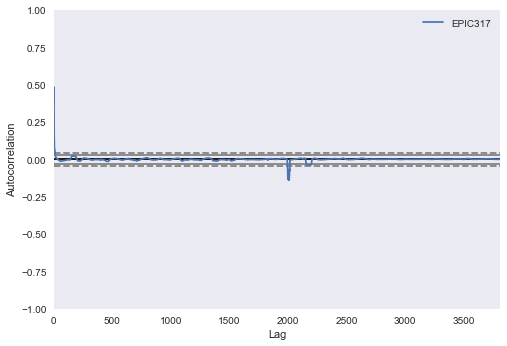

In [26]:
autocorrelation_plot(df.EPIC317.dropna(), label='EPIC317');

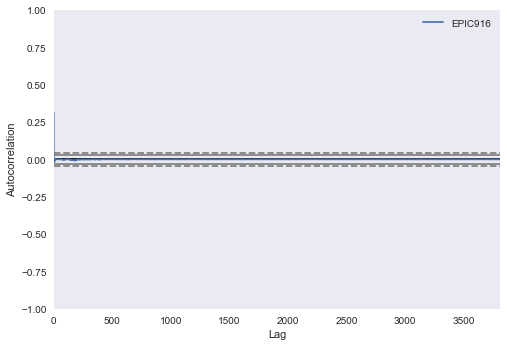

In [27]:
autocorrelation_plot(df.EPIC916.dropna(), label='EPIC916');

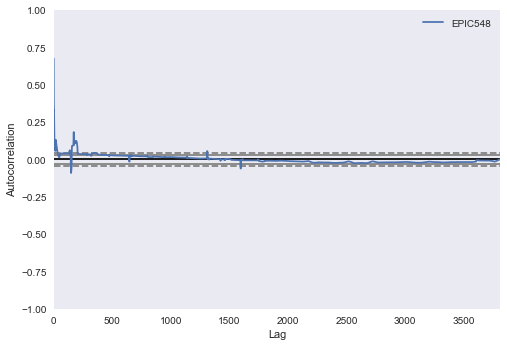

In [28]:
autocorrelation_plot(df.EPIC548.dropna(), label='EPIC548');

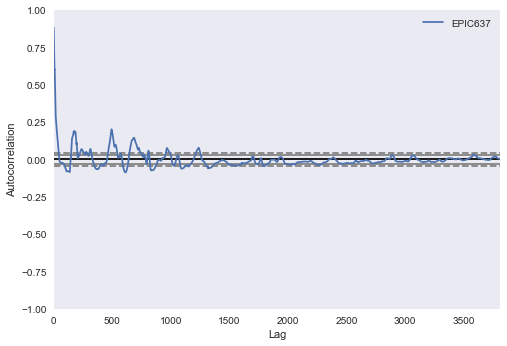

In [29]:
autocorrelation_plot(df.EPIC637.dropna(), label='EPIC637');

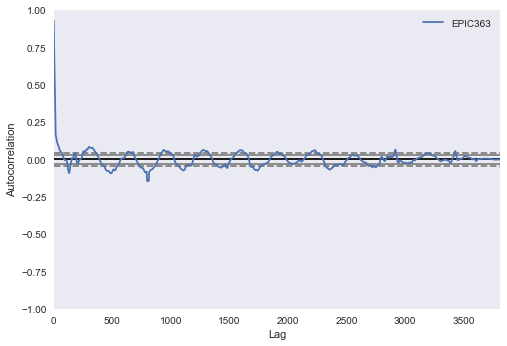

In [30]:
autocorrelation_plot(df.EPIC363.dropna(), label='EPIC363');

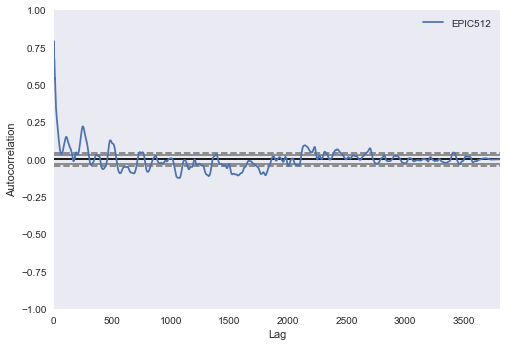

In [31]:
autocorrelation_plot(df.EPIC512.dropna(), label='EPIC512');

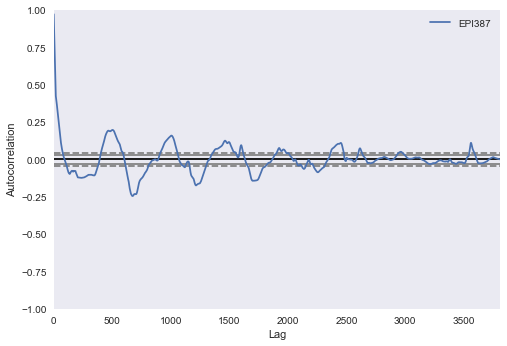

In [32]:
autocorrelation_plot(df.EPIC387.dropna(), label='EPI387');

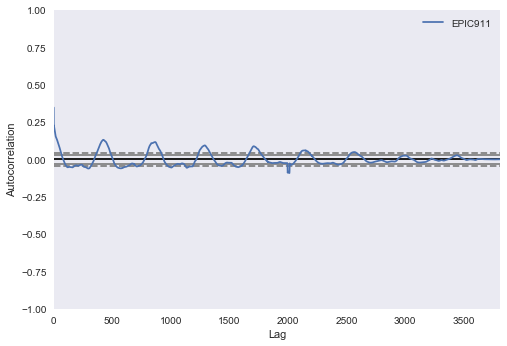

In [33]:
autocorrelation_plot(df.EPIC911.dropna(), label='EPIC911');

In [13]:
import pytransit as pt

In [22]:
import numpy as np
from pytransit import MandelAgol

t = np.linspace(0.8,1.2,500)
k, t0, p, a, i, e, w = 0.1, 1.01, 4, 8, 0.48*np.pi, 0.2, 0.5*np.pi
#u = [0.25,0.10]
u = [[0.25, 0.1],[0.35,0.2],[0.45,0.3],[0.55,0.4]]

pv = [k, u, t0, p, a, i, e, w]

m = MandelAgol()
f = m.evaluate(t, *pv)

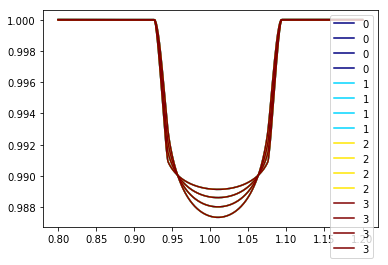

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib.pyplot import cm 

n = len(u)
color=plt.cm.jet(np.linspace(0,1,n))

for i,c in zip(range(n),color):
    plt.plot(t,f,'-',color=c, label=i);
plt.legend(loc='best')